# Statistiques descriptives

In [49]:
import pandas as pd
import numpy as np
import os
import s3fs
import re
import matplotlib.pyplot as plt

In [50]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

# 1 - Comportement d'achat

In [3]:
# Chargement des données temporaires
BUCKET = "projet-bdc2324-team1"
FILE_KEY_S3 = "0_Temp/Company 1 - Purchasing behaviour.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    tickets_kpi = pd.read_csv(file_in, sep=",")

In [4]:
tickets_kpi.head()

customer_id  event_type_id  nb_tickets  total_amount  nb_suppliers  \
0            1              2      384226     2686540.5             7   
1            1              4      453242     3248965.5             6   
2            1              5      201750     1459190.0             6   
3            1              6      217356     1435871.5             5   
4            2              2         143           0.0             1   

   vente_internet_max          purchase_date_min          purchase_date_max  \
0                   1  2014-12-03 14:55:37+00:00  2023-11-04 15:12:16+00:00   
1                   1  2013-09-23 14:45:01+00:00  2023-11-03 14:11:01+00:00   
2                   1  2013-06-10 10:37:58+00:00  2023-11-08 15:59:45+00:00   
3                   1  2017-01-01 02:20:08+00:00  2019-12-31 02:20:06+00:00   
4                   0  2018-04-07 12:55:07+00:00  2020-03-08 12:06:43+00:00   

  time_between_purchase  nb_tickets_internet  
0    3258 days 00:16:39                 51.0  
1    3692 days 23:26:00               2988.0  
2    3803 days 05:21:47                  9.0  
3    1093 days 23:59:58                  5.0  
4     700 days 23:11:36                  0.0

In [5]:
tickets_kpi.columns

Index(['customer_id', 'event_type_id', 'nb_tickets', 'total_amount',
       'nb_suppliers', 'vente_internet_max', 'purchase_date_min',
       'purchase_date_max', 'time_between_purchase', 'nb_tickets_internet'],
      dtype='object')

In [6]:
# Présence d'outlier
tickets_kpi.sort_values(by = ['nb_tickets'], axis = 0, ascending = False).head(10)

customer_id  event_type_id  nb_tickets  total_amount  nb_suppliers  \
1                1              4      453242     3248965.5             6   
0                1              2      384226     2686540.5             7   
3                1              6      217356     1435871.5             5   
2                1              5      201750     1459190.0             6   
5032          6733              6       14208           0.0             3   
5029          6733              2       11656         471.0             3   
5030          6733              4        7440           0.0             2   
60              41              6        6583       12546.5             4   
57              41              2        6514       22423.0             6   
36376        63488              4        5750       63250.0             1   

       vente_internet_max          purchase_date_min  \
1                       1  2013-09-23 14:45:01+00:00   
0                       1  2014-12-03 14:55:37+00:00   
3                       1  2017-01-01 02:20:08+00:00   
2                       1  2013-06-10 10:37:58+00:00   
5032                    1  2017-01-11 15:00:54+00:00   
5029                    1  2015-09-09 13:48:38+00:00   
5030                    1  2021-01-06 10:05:01+00:00   
60                      1  2017-01-02 11:23:53+00:00   
57                      1  2014-01-23 16:56:57+00:00   
36376                   1  2021-06-04 12:20:39+00:00   

               purchase_date_max time_between_purchase  nb_tickets_internet  
1      2023-11-03 14:11:01+00:00    3692 days 23:26:00               2988.0  
0      2023-11-04 15:12:16+00:00    3258 days 00:16:39                 51.0  
3      2019-12-31 02:20:06+00:00    1093 days 23:59:58                  5.0  
2      2023-11-08 15:59:45+00:00    3803 days 05:21:47                  9.0  
5032   2019-11-27 09:47:06+00:00    1049 days 18:46:12              13497.0  
5029   2022-07-07 07:37:12+00:00    2492 days 17:48:34               9815.0  
5030   2022-09-08 14:39:40+00:00     610 days 04:34:39               7419.0  
60     2019-12-30 10:36:55+00:00    1091 days 23:13:02               6391.0  
57     2023-03-06 13:55:23+00:00    3328 days 20:58:26               5321.0  
36376  2022-08-25 13:08:38+00:00     447 days 00:47:59               5750.0

In [7]:
# Part du CA par customer
total_amount_share = tickets_kpi.groupby('customer_id')['total_amount'].sum().reset_index()
total_amount_share['total_amount_entreprise'] = total_amount_share['total_amount'].sum()
total_amount_share['share_total_amount'] = total_amount_share['total_amount']/total_amount_share['total_amount_entreprise']

total_amount_share_index = total_amount_share.set_index('customer_id')
df_circulaire = total_amount_share_index['total_amount'].sort_values(axis = 0, ascending = False)


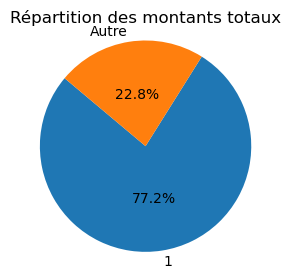

In [8]:
# Costumer 1 vs others customers
coupure = 1

top = df_circulaire[:coupure]
rest = df_circulaire[coupure:]

# Calculez la somme du reste
rest_sum = rest.sum()

# Créez une nouvelle série avec les cinq plus grandes parts et 'Autre'
new_series = pd.concat([top, pd.Series([rest_sum], index=['Autre'])])

# Créez le graphique circulaire
plt.figure(figsize=(3, 3))
plt.pie(new_series, labels=new_series.index, autopct='%1.1f%%', startangle=140, pctdistance=0.5)
plt.axis('equal')  # Assurez-vous que le graphique est un cercle
plt.title('Répartition des montants totaux')
plt.show()


In [9]:
tickets_kpi_filtered  = tickets_kpi[tickets_kpi['customer_id'] != 1]

# 2 - Comportement d'achat bis (Alexis)

In [74]:
# Chargement des données temporaires
BUCKET = "projet-bdc2324-team1"
FILE_KEY_S3 = "0_Temp/Company 1 - customer_event.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    customer = pd.read_csv(file_in, sep=",")

print(customer.shape)
customer.head()

(141017, 39)


/tmp/ipykernel_526/626921812.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  customer = pd.read_csv(file_in, sep=",")


customer_id birthdate  street_id  is_partner  gender  is_email_true opt_in  \
0            1       NaN          2       False       2           True  False   
1            1       NaN          2       False       2           True  False   
2            1       NaN          2       False       2           True  False   
3            1       NaN          2       False       2           True  False   
4            2       NaN          2       False       1           True   True   

   structure_id profession language  ...  vente_internet_max  \
0           NaN        NaN      NaN  ...                 1.0   
1           NaN        NaN      NaN  ...                 1.0   
2           NaN        NaN      NaN  ...                 1.0   
3           NaN        NaN      NaN  ...                 1.0   
4           NaN        NaN      NaN  ...                 0.0   

           purchase_date_min          purchase_date_max  \
0  2014-12-03 14:55:37+00:00  2023-11-04 15:12:16+00:00   
1  2017-01-01 02:20:08+00:00  2019-12-31 02:20:06+00:00   
2  2013-09-23 14:45:01+00:00  2023-11-03 14:11:01+00:00   
3  2013-06-10 10:37:58+00:00  2023-11-08 15:59:45+00:00   
4  2019-03-09 13:14:21+00:00  2019-11-13 11:29:55+00:00   

   time_between_purchase  nb_tickets_internet          name_event_types  \
0     3258 days 00:16:39                 51.0  offre muséale individuel   
1     1093 days 23:59:58                  5.0          formule adhésion   
2     3692 days 23:26:00               2988.0          spectacle vivant   
3     3803 days 05:21:47                  9.0      offre muséale groupe   
4      248 days 22:15:34                  0.0          formule adhésion   

   avg_amount  nb_campaigns  nb_campaigns_opened  time_to_open  
0    6.150659           NaN                  NaN           NaN  
1    6.439463           NaN                  NaN           NaN  
2    7.762474           NaN                  NaN           NaN  
3    4.452618           NaN                  NaN           NaN  
4    6.439463           4.0                  0.0           NaN  

[5 rows x 39 columns]

In [75]:
customer.columns

Index(['customer_id', 'birthdate', 'street_id', 'is_partner', 'gender',
       'is_email_true', 'opt_in', 'structure_id', 'profession', 'language',
       'mcp_contact_id', 'last_buying_date', 'max_price', 'ticket_sum',
       'average_price', 'fidelity', 'average_purchase_delay',
       'average_price_basket', 'average_ticket_basket', 'total_price',
       'purchase_count', 'first_buying_date', 'country', 'age', 'tenant_id',
       'event_type_id', 'nb_tickets', 'total_amount', 'nb_suppliers',
       'vente_internet_max', 'purchase_date_min', 'purchase_date_max',
       'time_between_purchase', 'nb_tickets_internet', 'name_event_types',
       'avg_amount', 'nb_campaigns', 'nb_campaigns_opened', 'time_to_open'],
      dtype='object')

In [81]:
achat = ['customer_id', 'average_price', 'average_purchase_delay', 'average_price_basket',
          'average_ticket_basket', 'purchase_count', 'total_price', 'nb_campaigns',
         'nb_campaigns_opened']

customer_achat = customer[achat].drop_duplicates(subset = ['customer_id'])
customer_achat['nb_campaigns'] = customer_achat['nb_campaigns'].fillna(0)
customer_achat['nb_campaigns_opened'] = customer_achat['nb_campaigns_opened'].fillna(0)
customer_achat = customer_achat.fillna(0)
customer_achat.head()

customer_id  average_price  average_purchase_delay  average_price_basket  \
0            1       7.030122              -67.790969             13.751530   
4            2       0.000000                0.000000              0.000000   
6            3      18.333333               30.666667             36.666667   
7            4      10.250000                5.000000             20.500000   
9            5       9.500000                0.000000             19.000000   

   average_ticket_basket  purchase_count  total_price  nb_campaigns  \
0               1.956087        641472.0    8821221.5           0.0   
4               1.000000           307.0          0.0           4.0   
6               2.000000             3.0        110.0         222.0   
7               2.000000             2.0         41.0           7.0   
9               2.000000             1.0         19.0           4.0   

   nb_campaigns_opened  
0                  0.0  
4                  0.0  
6                124.0  
7                  7.0  
9                  0.0

In [80]:
customer_wto_outlier = customer_achat[customer_achat['customer_id']!=1]

customer_wto_outlier[['average_price', 'average_purchase_delay', 'average_price_basket',
          'average_ticket_basket', 'purchase_count', 'total_price', 'nb_campaigns', 'nb_campaigns_opened']].describe()

average_price  average_purchase_delay  average_price_basket  \
count  136732.000000           136732.000000         136732.000000   
mean        5.036239             -158.651558             10.798108   
std         7.970184             2616.844158             48.790052   
min         0.000000           -44862.000000              0.000000   
25%         0.000000                0.000000              0.000000   
50%         0.000000                0.000000              0.000000   
75%        11.000000                0.000000             18.000000   
max       290.000000             1914.000000           9900.000000   

       average_ticket_basket  purchase_count    total_price   nb_campaigns  \
count          136732.000000   136732.000000  136732.000000  136732.000000   
mean                1.679139        0.646849      16.670209      45.189349   
std                 7.117265        5.464266     327.464173      72.996326   
min                 0.000000        0.000000       0.000000       0.000000   
25%                 0.000000        0.000000       0.000000       2.000000   
50%                 0.000000        0.000000       0.000000       6.000000   
75%                 2.000000        1.000000      19.000000      38.000000   
max               900.000000     1508.000000   64350.000000     439.000000   

       nb_campaigns_opened  
count        136732.000000  
mean              8.673193  
std              24.226327  
min               0.000000  
25%               0.000000  
50%               1.000000  
75%               4.000000  
max             434.000000

# 3 - Event

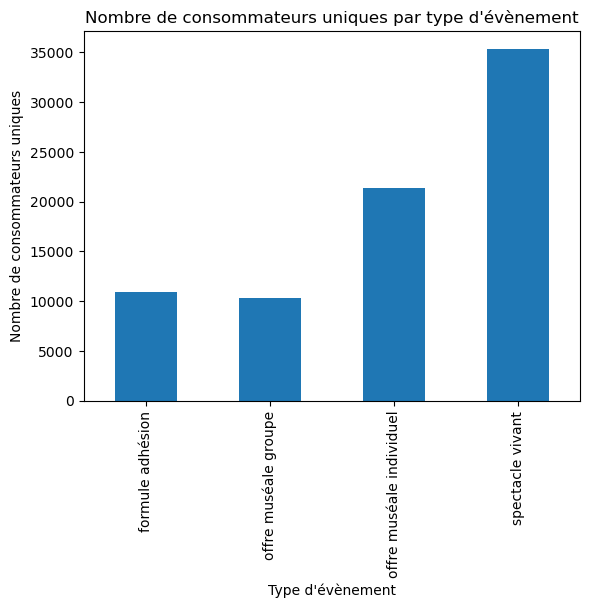

In [10]:
# Nombre de consommateurs uniques par type d'évènement

event_counts = customer.groupby('name_event_types')['customer_id'].nunique()

event_counts.plot(kind='bar')
plt.xlabel("Type d'évènement")
plt.ylabel('Nombre de consommateurs uniques')
plt.title("Nombre de consommateurs uniques par type d'évènement")
plt.show()

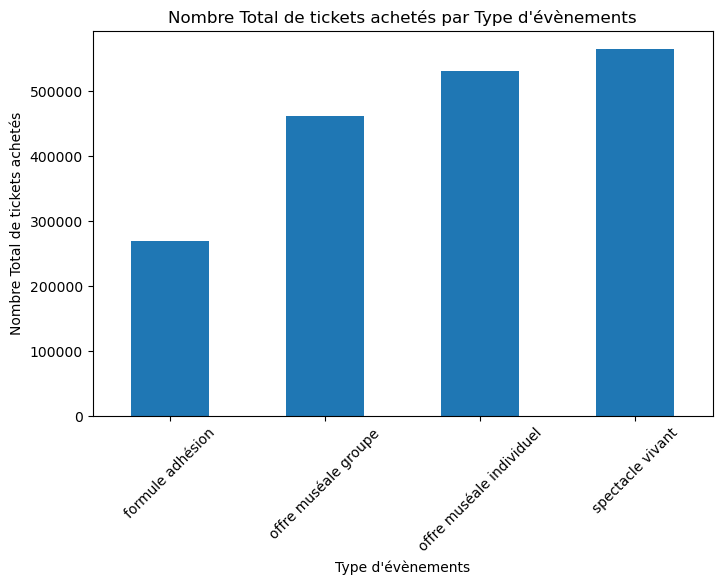

In [13]:
# Nombre Total de tickets achetés par Type d'évènements

total_tickets_by_event = customer.groupby('name_event_types')['nb_tickets'].sum()

total_tickets_by_event.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènements")
plt.ylabel('Nombre Total de tickets achetés')
plt.title("Nombre Total de tickets achetés par Type d'évènements")
plt.xticks(rotation=45)
plt.show()

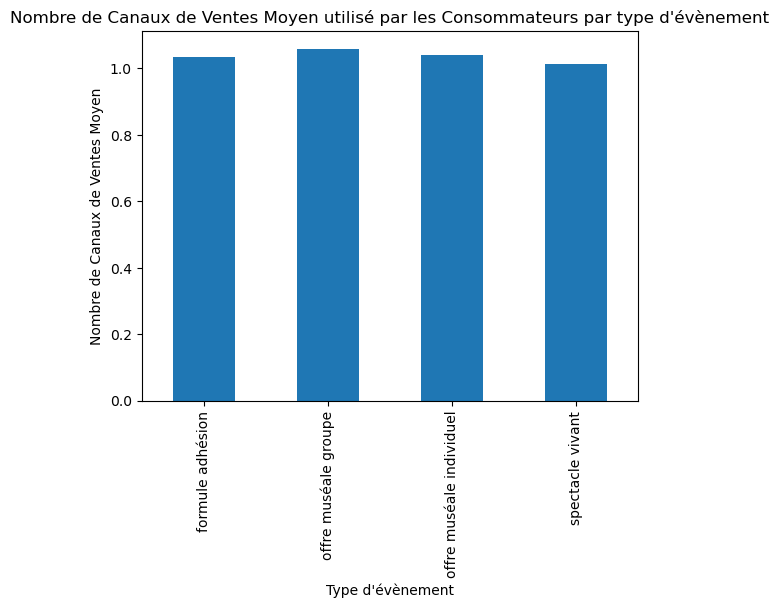

In [18]:
# Nombre de Canaux de Ventes Moyen utilisé par les Consommateurs par type d'évènement

avg_supp_event = customer.groupby('name_event_types')['nb_suppliers'].mean()
avg_supp_event.plot(kind='bar')
plt.xlabel("Type d'évènement")
plt.ylabel('Nombre de Canaux de Ventes Moyen')
plt.title("Nombre de Canaux de Ventes Moyen utilisé par les Consommateurs par type d'évènement")
plt.show()

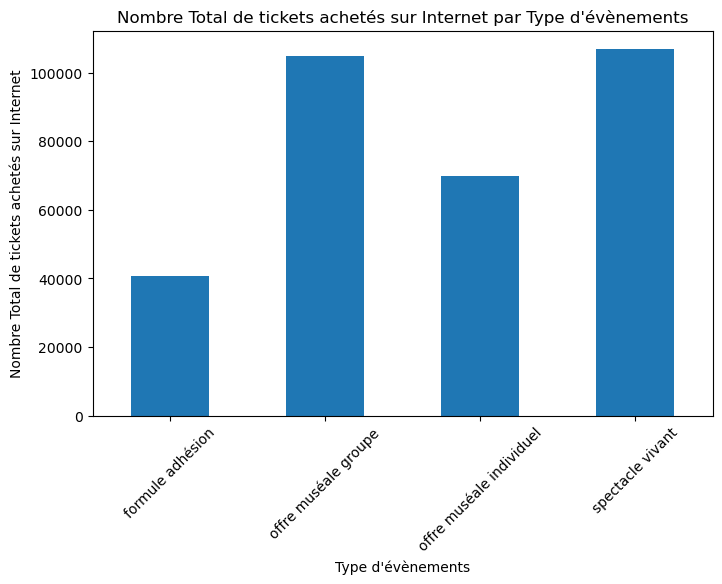

In [20]:
# Nombre Total de tickets achetés sur Internet par Type d'évènements

nb_tickets_internet = customer.groupby('name_event_types')['nb_tickets_internet'].sum()
nb_tickets_internet.plot(kind='bar', figsize=(8, 5))
plt.xlabel("Type d'évènements")
plt.ylabel('Nombre Total de tickets achetés sur Internet')
plt.title("Nombre Total de tickets achetés sur Internet par Type d'évènements")
plt.xticks(rotation=45)
plt.show()

# 3 - Caractéristiques Démographiques (peu exploitable)

In [41]:
customer.columns

Index(['customer_id', 'birthdate', 'street_id', 'is_partner', 'gender',
       'is_email_true', 'opt_in', 'structure_id', 'profession', 'language',
       'mcp_contact_id', 'last_buying_date', 'max_price', 'ticket_sum',
       'average_price', 'fidelity', 'average_purchase_delay',
       'average_price_basket', 'average_ticket_basket', 'total_price',
       'purchase_count', 'first_buying_date', 'country', 'age', 'tenant_id',
       'event_type_id', 'nb_tickets', 'total_amount', 'nb_suppliers',
       'vente_internet_max', 'purchase_date_min', 'purchase_date_max',
       'time_between_purchase', 'nb_tickets_internet', 'name_event_types',
       'avg_amount'],
      dtype='object')

In [39]:
def percent_of_na(df, column):
    na_percentage = df[column].isna().mean() * 100
    non_na_percentage = 100 - na_percentage
    
    labels = ['Valeurs Manquantes', 'Non-Valeurs Manquantes']
    sizes = [na_percentage, non_na_percentage]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal') 
    plt.title('Pourcentage de Valeurs Manquantes : {}'.format(column))
    plt.show()

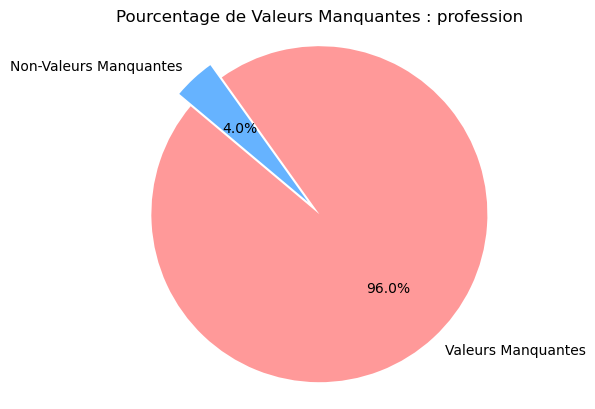

In [40]:
percent_of_na(customer, 'profession')

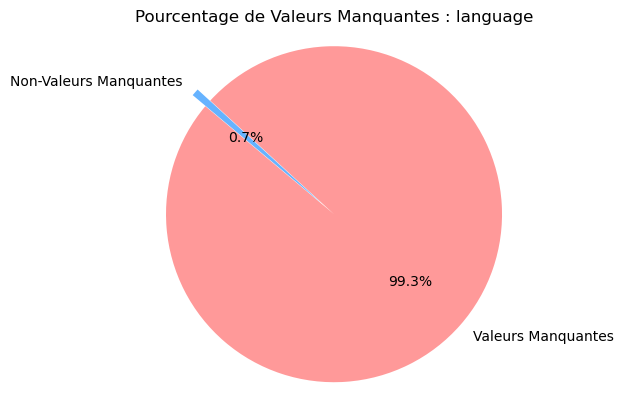

In [42]:
percent_of_na(customer, 'language')